# Network

In [26]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import Dataset, DataLoader
from matplotlib import pyplot as plt

In [27]:
# Load data
df = pd.read_csv('C:\\school\\Vakken\\MachineLearning\\kruisjesrondjes\\aalborg.csv', sep=";")
# df

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# device = torch.device('cpu')
device

device(type='cuda')

In [28]:
# Assuming the last column is the target
dfSelected = df.copy()
dfSelected.dropna(axis=0)
input = dfSelected[['s_speed_x', 's_speed_y','s_angle','s_track_position']]
output = dfSelected[['a_brake', 'a_accelation','a_steer']]
print(input.size)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(input, output, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

import pickle

# Assuming 'scaler' is your trained scaler object
with open('../models/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)



115948


In [29]:


# X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
# X_test = torch.tensor(X_test, dtype=torch.float32).to(device)
# y_train = torch.tensor(y_train.values, dtype=torch.float32).to(device)
# y_test = torch.tensor(y_test.values, dtype=torch.float32).to(device)

# print(X_test.shape)
# print(y_train.shape)
# y_train

In [30]:


class CustomDataset(Dataset):
    def __init__(self, features, labels):
        # print(features.shape)
        self.features = torch.tensor(features, dtype=torch.float32).to(device)
        # print(labels.values.shape)
        self.labels = torch.tensor(labels.values, dtype=torch.float32).to(device)
        
    def __len__(self):
        return len(self.features)
    
    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

train_dataset = CustomDataset(X_train, y_train)
test_dataset = CustomDataset(X_test, y_test)
#dataloader
train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)



In [31]:

class Net(nn.Module):
    def __init__(self, input_size, num_classes):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, num_classes)
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the network
input_size = X_train.shape[1]
num_classes = len(set(output))
net = Net(input_size, num_classes).to(device)



In [32]:


# criterion = nn.CrossEntropyLoss()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)
# optimizer = optim.Adam(net.parameters(), lr=0.01)




In [35]:
# Training loop
loss_data = []
test_losses = []

epochs = 100
for epoch in range(epochs):
    net.train()
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader):
        # Move inputs and labels to GPU
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero the parameter gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        # print(loss.item())
        # if i % 100 == 99:    # Print every 100 mini-batches
        #     print(f'Epoch [{epoch+1}/{epochs}], Step [{i+1}/{len(train_loader)}], Loss: {running_loss/100}')
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader)}')
    loss_data.append(running_loss/len(train_loader))

    # Evaluation
    net.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        test_loss = 0
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            print(len(test_loader))
        test_losses.append(test_loss/len(test_loader))
        

print('Finished Training')

plt.plot(loss_data, label = "training_loss")
plt.plot(test_losses, label = "test_loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()
plt.show()



Epoch [1/100], Loss: 0.038963188632176474
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
Epoch [2/100], Loss: 0.03891171719674226
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
182
1

KeyboardInterrupt: 

Stochastic GD, learning rate = 0.1, batch_size = 64

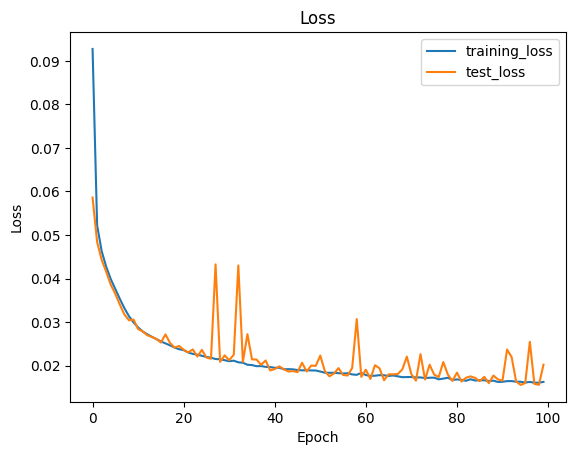

Stochastic GD, learning rate = 0.01, batch_size = 64

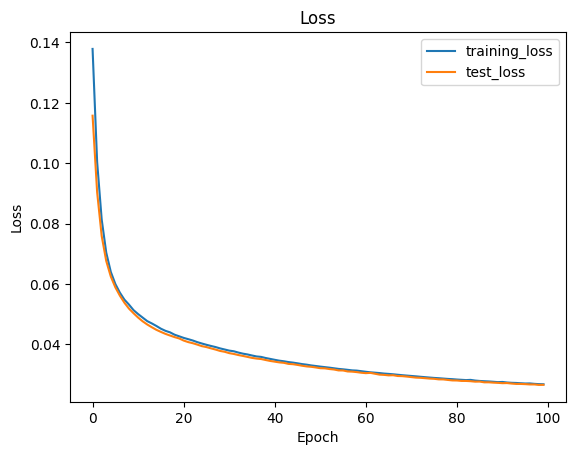

Adam, learning rate = 0.1, batch_size = 64

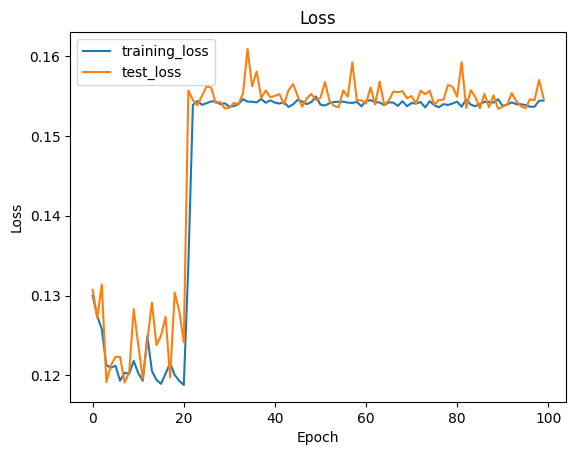

Adam, learning rate = 0.01, batch_size = 64

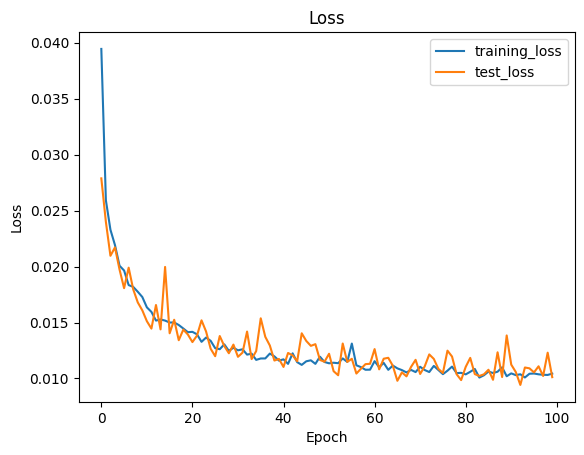


asdf
0.0021361282893589567
0.003639458627491207
0.005232401274062775
0.007447179857191149
0.009242601774551057
0.011136186646891165
0.0130609542458922
0.014709915761109237
0.01591922015279204
0.017027073836588597
0.018336428308879937
0.02001725849541989
0.02170483350426286
0.023406900792986483
0.024630762472912505
0.026065931952261662
0.02784556780870144
0.02908486062353784
0.030609174089117366
0.03195960868845929
0.033576007727738263
0.03558302826278812
0.03718598596342317
0.03935625903554015
0.04067626767433607
0.043730647763708136
0.04569342216620079
0.047749282976428234
0.0491205918101164
0.05046659658898364
0.05170578394944851
0.05300472684941449
0.054615351443107314
0.05646540167239996
0.057683691791780706
0.059073591379673926
0.06127851571028049
0.06256150290533737
0.06388110913090654
0.06526410194871189
0.06763396805131829
0.06906233424996282
0.07081145842324246
0.07210418033403354
0.07405896378414971
0.07608177562008847
0.07747522119309876
0.07869144463604623
0.080907596909737

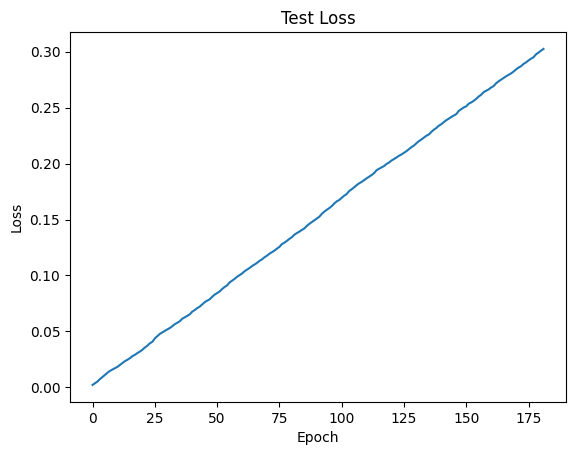

In [25]:
PATH = '../models/alpha/model_epoch_217.pth'
# torch.save(net.state_dict(), PATH)

net.load_state_dict(torch.load(PATH))
test_losses = []

# Evaluation
net.eval()  # Set the model to evaluation mode
with torch.no_grad():
    print("asdf")
    test_loss = 0
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        print(test_loss/len(test_loader))
        test_losses.append(test_loss/len(test_loader))
print('Test loss:', test_loss / len(test_loader))
print(test_losses)

# print(f'Accuracy of the network on the test data: {100 * correct / total}%')
plt.plot(test_losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Test Loss')
plt.show()